 <a name="1"></a>
# <span style="color:green">Задачи исследования:<span>
    
- проанализировать тарифные планы компании
- проанализировать поведение клиентов компании использующие тарифные планы представленные ниже
- сделать вывод — какой тариф приносит больше денег.

### Описание тарифов

##### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов.
    Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

##### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

# План 

## 1. [Осмотр и изучение данных](#1)

## 2. [Предобработка данных](#2)

- исправление ошибок в данных
- проверка и предварительный анализ

## 3. [Подготовка, очистка и добавление данных](#3)

- индексы и названия столбцов
- работа с дубликатами
- работа с пропущенными значениями
- изменение типов данных
- добавление дополнительных метрик **для каждого пользователя:**
      
      
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

## 4. [Исследовательский анализ данных](#4)

- Опишите поведение клиентов оператора, исходя из выборки.
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы.
  
## 5. [Проверка гипотез](#5)

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
  
## 6. [Выводы и результаты исследования](#6)

# 1. Импорт библиотек и чтение данных

In [164]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10,7
pd.set_option('display.max_columns', None)
font = {'size': 16}

from scipy import stats as st

In [3]:
calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')
users = pd.read_csv('datasets/users.csv')

### 1.1 Таблица звонков

In [4]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### 1.2 Таблица интернет трафика

In [6]:
internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


### 1.3 Таблица сообщений

In [8]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### 1.3 Таблица пользователей

In [10]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### 1.4 Таблица тарифов

In [12]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


 <a name="2"></a>
# 2. Предобработка данных и предварительный анализ
[К оглавлению](#1)

### Распределение пользователей по тарифам

In [13]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

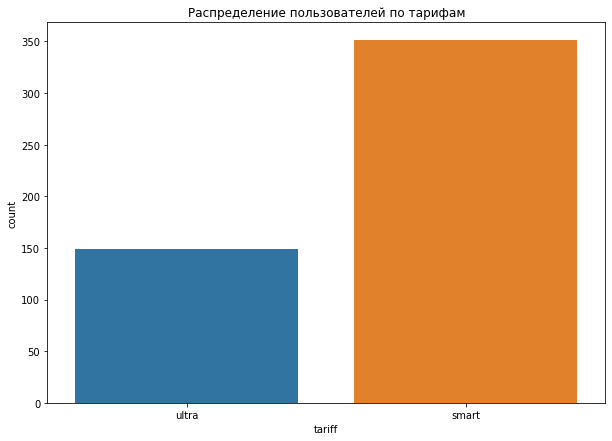

In [14]:
sns.countplot(users['tariff'])
plt.title('Распределение пользователей по тарифам');

In [15]:
## дейсвтующих
users[users['churn_date'].isna()]['tariff'].value_counts()

smart    328
ultra    134
Name: tariff, dtype: int64

In [16]:
## прекративших пользоваться услугами
users[~users['churn_date'].isna()]['tariff'].value_counts()

smart    23
ultra    15
Name: tariff, dtype: int64

In [17]:
users['churn_date'].fillna(False, inplace=True)


In [18]:
def split_charn(value):
    if value:
        return True
    return False

In [19]:
users['churn_date'] = users['churn_date'].apply(split_charn)

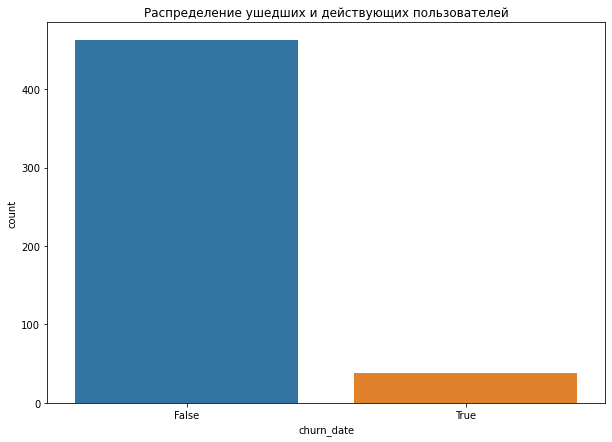

In [20]:
sns.countplot(users['churn_date'])
plt.title('Распределение ушедших и действующих пользователей');

### Звоники длительностью менее 1 минуты

In [21]:
calls[calls['duration'] < 1]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202596,1499_209,2018-12-16,0.00,1499


### Вывод:
**Всего в нашей выборке 500 абонентов:**
- тариф smart 351 пользователя
- тариф ultra 149 пользователя

##### из которых действующих 462:

- тариф smart 328
- тариф ultra 134

##### прекративших пользоваться услугами 38**:
- тариф smart 23
- тариф ultra 15

**Предварительный анализ показал что:**

- Требуется изменить в данных тип данных всех дат в datetime
- Столбец **churn_date** можно изменить на True и False - по желанию
- Опереатор всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Значит требуется округлить значения меньше минуты 
- Интернет трафик по тарифу расчитывается в Гб а в таблице Мб. Обратить внимание при обобщении трафика для каждого usera 

<a name="3"></a>
# 3. Подготовка и очистка данных
[К оглавлению](#1)


### Изменяем тип данных в таблицах

In [22]:
def get_datetime(data, columns):
    for col in columns:
        data[col] = data[col].astype('datetime64[ns]')
    return data

In [23]:
get_datetime(calls, ['call_date'])
get_datetime(internet, ['session_date'])
get_datetime(messages, ['message_date'])
get_datetime(users, ['reg_date'])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,False,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,False,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,False,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,True,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Округлим данные по звонкам и заменим нули на 1

In [24]:
# Смотрим сколько данных меньше 1 минуты
calls[calls['duration'] < 1]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202596,1499_209,2018-12-16,0.00,1499


In [25]:
# Приводим значения в порядок
calls['duration'] = calls['duration'].apply(np.ceil).astype('int').replace(0, 1)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


### Округлим данные интерент сессий, заменим нули на 1

In [26]:
# Смотрим данные по интернет сессиям
internet[internet['mb_used'] < 1]

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


In [27]:
# Приводим значения в порядок
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int').replace(0, 1)
internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,1,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


## 3.2 Добавление дополнительных метрик для пользователей:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

### 3.2.1 Месячные показатели

- Количество сделанных звонков и израсходованных минут разговора по месяцам

- Количество отправленных сообщений по месяцам
- Количество израсходанного трафика

In [28]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [29]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [30]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


### Группируем данные
- Существует множество вариантов для группировки и создания таблиц, но для дальнейшего обучения моделей лучше выделять признаки в отдельный столбец а для статистической оценки строками

### Звонки

In [31]:
calls_month = calls.pivot_table(index=['month', 'user_id'], 
                                values='duration',
                                aggfunc=['count', 'sum'],
                                fill_value = 0)
calls_month = pd.DataFrame(calls_month.to_records())
## Переименуем столбцы
calls_month['count_calls'] = calls_month.iloc[:,2]
calls_month['minutes_calls'] = calls_month.iloc[:,3]
calls_month.drop(calls_month.columns[2:4], axis=1, inplace=True)
calls_month.head(2)

,month,user_id,count_calls,minutes_calls
0,1,1005,15,99
1,1,1032,61,397


### Сообщения

In [32]:
messages_month = messages.pivot_table(index=['month','user_id'], 
                                      values='id',
                                      aggfunc='count',
                                      fill_value = 0)
messages_month = pd.DataFrame(messages_month.to_records())
messages_month.rename({'id': 'count_messages'}, axis=1, inplace=True)
messages_month.head(2)

,month,user_id,count_messages
0,1,1005,7
1,1,1032,38


### Интернет

In [33]:
internet_month = internet.pivot_table(index=['month', 'user_id'],
                                      values='mb_used',
                                      aggfunc='sum',
                                      fill_value = 0)
internet_month = pd.DataFrame(internet_month.to_records())
internet_month.head(2)

,month,user_id,mb_used
0,1,1005,2730
1,1,1032,24158


In [34]:
len(calls_month), len(messages_month), len(internet_month)

(3174, 2717, 3203)

### Обьединяем данные для анализа

In [35]:
df = ( 
        calls_month.merge(messages_month, how='outer', on=['user_id', 'month'])
                   .merge(internet_month, how='outer', on=['user_id', 'month'])
      )

In [36]:
# Пропуски заменяем на 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           3214 non-null   int64  
 1   user_id         3214 non-null   int64  
 2   count_calls     3174 non-null   float64
 3   minutes_calls   3174 non-null   float64
 4   count_messages  2717 non-null   float64
 5   mb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [37]:
df.fillna(0, inplace=True)

### 3.2.2 Помесячная выручка с каждого пользователя 

- (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

### Добавим тариф и данные по тарифу

In [38]:
temp = users[['user_id', 'tariff']]

In [39]:
# Добавляем тариф
df = df.merge(temp, on='user_id', how='left')


In [40]:
df = df.rename(columns={'tariff': 'tariff_name'})

In [41]:
df.head(2)

,month,user_id,count_calls,minutes_calls,count_messages,mb_used,tariff_name
0,1,1005,15.0,99.0,7.0,2730.0,smart
1,1,1032,61.0,397.0,38.0,24158.0,smart


In [42]:
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [43]:
df = df.merge(tariffs, on='tariff_name', how='left')

In [44]:
df.head(5)

,month,user_id,count_calls,minutes_calls,count_messages,mb_used,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,15.0,99.0,7.0,2730.0,smart,50,15360,500,550,200,3,3
1,1,1032,61.0,397.0,38.0,24158.0,smart,50,15360,500,550,200,3,3
2,1,1045,1.0,9.0,5.0,2348.0,smart,50,15360,500,550,200,3,3
3,1,1055,64.0,568.0,30.0,17115.0,smart,50,15360,500,550,200,3,3
4,1,1071,24.0,200.0,16.0,15625.0,smart,50,15360,500,550,200,3,3


### Расчитываем стоимость услуг согласно тарифов

In [45]:
def profit_calls(row):
    """
    Функция возвращает выручку по звонкам по месяцам
    """
    if row['minutes_calls'] > row['minutes_included']:
        minutes = row['minutes_calls'] - row['minutes_included']
        # минуты сверх лимита
        row['calls_over_limit'] = minutes
        # стоимость месяца по тарифу + 
        row['cost_calls'] = minutes * row['rub_per_minute']
        return row
    else:
        row['cost_calls'] = 0
        return row

In [46]:
def profit_messages(row):
    """
    Функция возвращает выручку по сообщениям по месяцам
    """
    if row['count_messages'] > row['messages_included']:
        messages = row['count_messages'] - row['messages_included']
        # смс сверх лимита
        row['messages_over_limit'] = messages
        # стоимость месяца по тарифу +
        row['cost_messages'] = messages * row['rub_per_message']
        return row
    else:
        row['cost_messages'] = 0
        return row

In [47]:
def profit_internet(row):
    """
    Функция возвращает выручку по интернет трафику по месяцам
    """
    if row['mb_used'] > row['mg_per_month_included']:
        mb = row['mb_used'] - row['mg_per_month_included']
        # смс сверх лимита
        row['mb_over_limit'] = mb
        # стоимость месяца по тарифу +
        row['cost_internet'] = np.ceil(mb/1024) * row['rub_per_gb']
        return row
    else:
        row['cost_internet'] = 0
        return row

In [48]:
df = df.apply(profit_calls, axis=1)
df = df.apply(profit_messages, axis=1)
df = df.apply(profit_internet, axis=1)

In [49]:
df.fillna(0, inplace=True)

In [50]:
df['additional_services'] = (df['cost_internet'] +
                             df['cost_messages'] +
                             df['cost_calls']
                            )
                             
df['total_paid'] = df['additional_services'] + df['rub_monthly_fee']

In [51]:
df = df.merge(users, on='user_id', how='left')
df.drop(['tariff'], axis=1, inplace=True)

### Отбираем нужные столбцы для дальнейшей статистической оценки


In [52]:
df.columns.tolist()
list_columns = [ 
                'user_id',
                'age',
                'tariff_name',
                'city',
                'month',
                'minutes_calls',
                'count_calls',
                'cost_calls',
                'count_messages',
                'cost_messages',
                'mb_used',
                'cost_internet',
                'additional_services',
                'total_paid',
                'churn_date'
]

In [53]:
data = df[list_columns]

<a name="4"></a>
# 4. Исследовательский анализ данных

[К оглавлению](#1)

- Опишите поведение клиентов оператора, исходя из выборки.
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. 


- data - выборка
- df - более полные данные

In [73]:
data.head()

,user_id,age,tariff_name,city,month,minutes_calls,count_calls,cost_calls,count_messages,cost_messages,mb_used,cost_internet,additional_services,total_paid,churn_date,region
0,1005,67,smart,Набережные Челны,1,99.0,15.0,0.0,7.0,0.0,2730.0,0.0,0.0,550.0,False,other
1,1032,31,smart,Ульяновск,1,397.0,61.0,0.0,38.0,0.0,24158.0,1800.0,1800.0,2350.0,False,other
2,1045,48,smart,Улан-Удэ,1,9.0,1.0,0.0,5.0,0.0,2348.0,0.0,0.0,550.0,False,other
3,1055,39,smart,Казань,1,568.0,64.0,204.0,30.0,0.0,17115.0,400.0,604.0,1154.0,False,other
4,1071,20,smart,Омск,1,200.0,24.0,0.0,16.0,0.0,15625.0,200.0,200.0,750.0,True,other


In [77]:
data[data['tariff_name'] == 'smart']['mb_used']

0        2730.0
1       24158.0
2        2348.0
3       17115.0
4       15625.0
         ...   
3189    11072.0
3194    17246.0
3200    19599.0
3206    17526.0
3212    17349.0
Name: mb_used, Length: 2229, dtype: float64

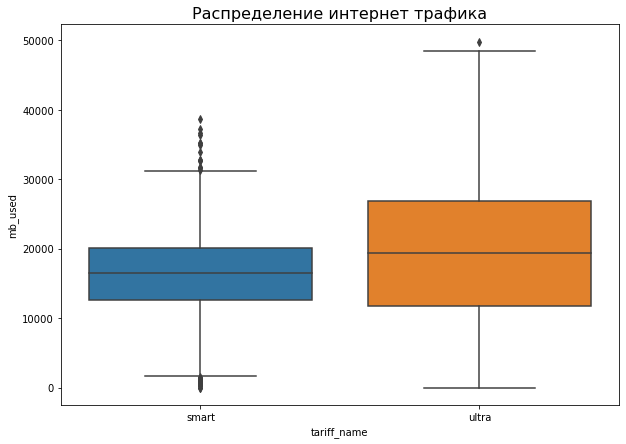

In [79]:
sns.boxplot(data['tariff_name'], data['mb_used'])
plt.title('Распределение интернет трафика', fontdict=font);



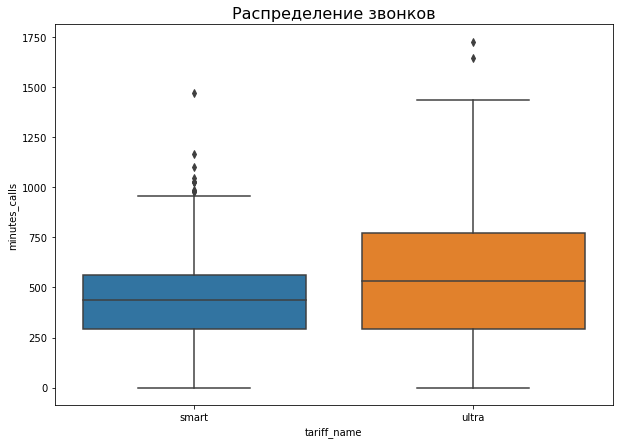

In [81]:
sns.boxplot(data['tariff_name'], data['minutes_calls'])
plt.title('Распределение звонков', fontdict=font);

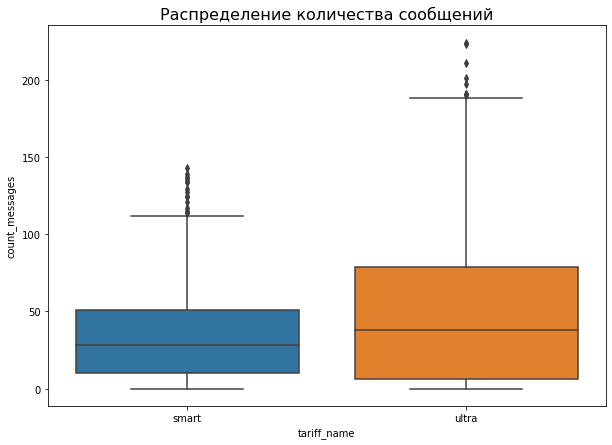

In [82]:
sns.boxplot(data['tariff_name'], data['count_messages'])
plt.title('Распределение количества сообщений', fontdict=font);

### Средняя цена  услуг в месяц по тарифам в разрезе услуг

In [55]:
tarifs_many = (df.pivot_table(index=['tariff_name', 'month'], values=['total_paid', 
                                     'additional_services', 
                                     'cost_calls',
                                     'cost_messages',
                                     'cost_internet'
                                    ] )
)
tarifs_many
# tarifs.loc['smart']

additional_services  cost_calls  cost_internet  \
tariff_name month                                                   
smart       1               173.352941    6.529412     164.705882   
            2               285.051724   51.931034     227.586207   
            3               628.571429  117.428571     496.103896   
            4               424.875000   92.437500     321.428571   
            5               669.106383   95.617021     557.446809   
            6               674.146341  102.256098     554.878049   
            7               696.472637  119.910448     559.203980   
            8               796.974468  139.059574     639.148936   
            9               724.500000  146.676923     560.769231   
            10              838.833333  150.785714     670.068027   
            11              816.996835  151.063291     647.468354   
            12             1056.038576  226.086053     807.715134   
ultra       1                 0.000000    0.000000       0.000000   
            2                25.000000    0.000000      25.000000   
            3                64.864865    0.000000      64.864865   
            4                51.818182    0.000000      51.818182   
            5               111.940299    0.000000     111.940299   
            6                91.071429    0.000000      91.071429   
            7               171.428571    0.000000     171.428571   
            8               133.177570    0.000000     133.177570   
            9                74.347826    0.000000      74.347826   
            10              117.073171    0.000000     117.073171   
            11              143.283582    0.000000     143.283582   
            12              188.848921    0.000000     188.848921   

                   cost_messages   total_paid  
tariff_name month                              
smart       1           2.117647   723.352941  
            2           5.534483   835.051724  
            3          15.038961  1178.571429  
            4          11.008929   974.875000  
            5          16.042553  1219.106383  
            6          17.012195  1224.146341  
            7          17.358209  1246.472637  
            8          18.765957  1346.974468  
            9          17.053846  1274.500000  
            10         17.979592  1388.833333  
            11         18.465190  1366.996835  
            12         22.237389  1606.038576  
ultra       1           0.000000  1950.000000  
            2           0.000000  1975.000000  
            3           0.000000  2014.864865  
            4           0.000000  2001.818182  
            5           0.000000  2061.940299  
            6           0.000000  2041.071429  
            7           0.000000  2121.428571  
            8           0.000000  2083.177570  
            9           0.000000  2024.347826  
            10          0.000000  2067.073171  
            11          0.000000  2093.283582  
            12          0.000000  2138.848921

### Тариф "Смарт"

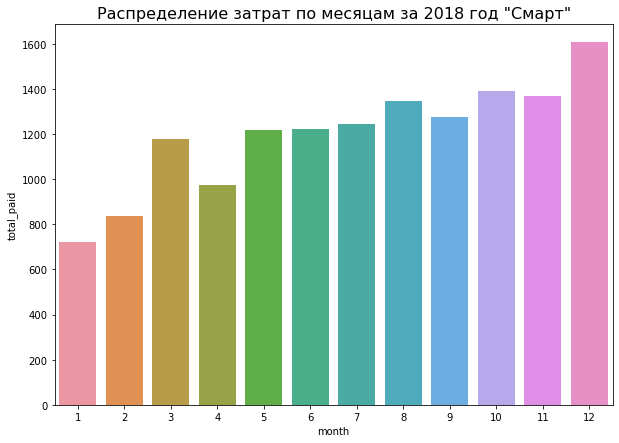

In [56]:
temp = tarifs_many.reset_index()
smart = temp[temp['tariff_name'] == 'smart']
sns.barplot(smart['month'], smart['total_paid'], data=smart)
plt.title('Распределение затрат по месяцам за 2018 год "Смарт"', fontdict=font);

### Тариф "Ультра"

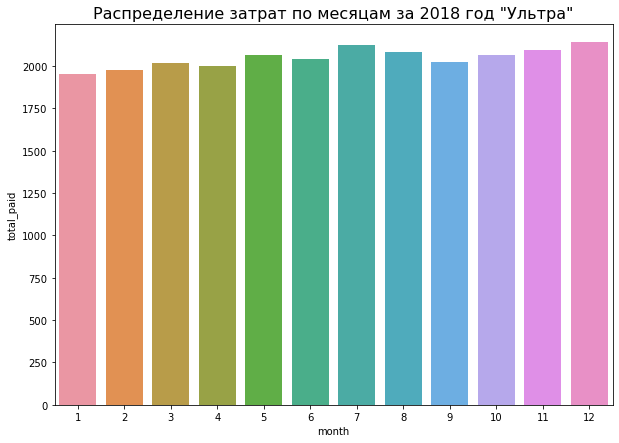

In [57]:
ultra = temp[temp['tariff_name'] == 'ultra']
sns.barplot(ultra['month'], ultra['total_paid'], data=ultra)
plt.title('Распределение затрат по месяцам за 2018 год "Ультра"', fontdict=font);

In [58]:
average_tarif = (df.pivot_table(index=['tariff_name'], 
                                values=['total_paid', 
                                      'additional_services', 
                                      'cost_calls',
                                      'cost_messages',
                                      'cost_internet'])
)
average_tarif

,additional_services,cost_calls,cost_internet,cost_messages,total_paid
tariff_name,,,,,
smart,762.512337,141.792732,603.319874,17.399731,1312.512337
ultra,121.065990,0.000000,121.065990,0.000000,2071.065990


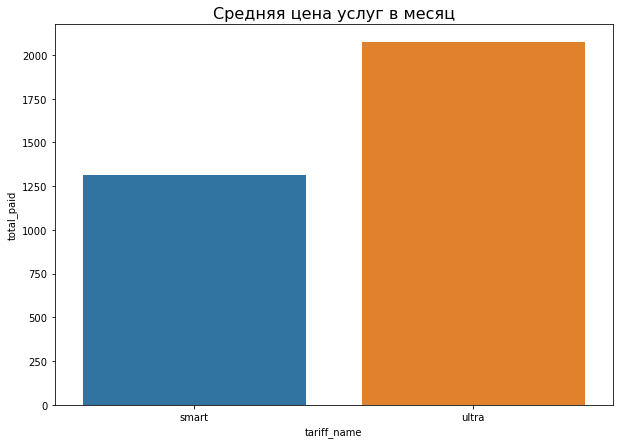

In [59]:
temp = average_tarif.reset_index()
sns.barplot(temp['tariff_name'], temp['total_paid'], data=temp)
plt.title('Средняя цена услуг в месяц', fontdict=font);

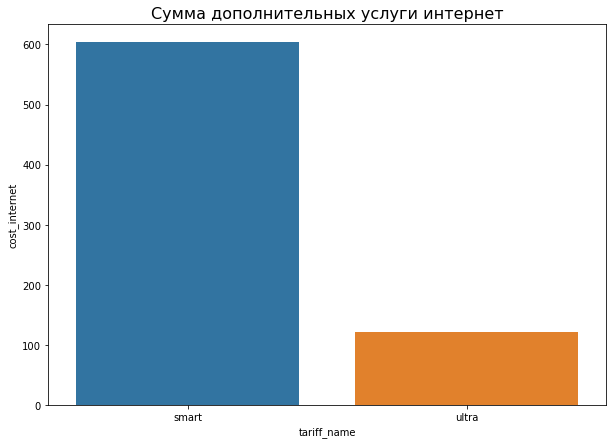

In [60]:
sns.barplot(temp['tariff_name'], temp['cost_internet'], data=temp)
plt.title('Сумма дополнительных услуги интернет', fontdict=font );

#### Вывод
- Графики распределения средств по месяцам показывают что пользователи тарифа "Ультра" платят за тариф каждый месяц примерно одинаково. Пользователи "Смарт" увеличивают расходы на услуги связи из месяца в месяц.
- Из обобщенной таблицы видим что средняя ежемесячная плата пользователей за услуги составляет:
    - тариф "Смарт" - 1312 рублей
    - тариф "Ультра" - 2071 рублей
- Польователи в тарифе "Смарт" платят за дополнительный сервис 762 руб., когда на тарифе "Ультра" эта сумма составляет 121 руб.
- Самая главная строка расходов это интернет трафик. практически вся сумма допов складывается из него.
- Пользователи "Смарт" тратят в 3 раза больще средств чем стоит их ежемесячный платеж за услуги. 
- Сообщения сегодня не в моде - скорее всего это связано с тем, что общение происходит через социальные сети.
- Стоимость 1 Гб интернет на тарифе "Смарт" стоит 200 рублей. График показывает, что пользователям данного тарифа ежемесячно не хватает 3-4 Гб трафика.

### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

### Использование услуг

In [61]:
tarifs_use = (df.pivot_table(index=['tariff_name', 'month'], values=[
                                                                     'minutes_calls', 
                                                                     'count_messages',
                                                                     'mb_used',
                                                                     'total_paid'])
              )
tarifs_use

count_messages       mb_used  minutes_calls   total_paid
tariff_name month                                                          
smart       1           18.235294   8528.588235     209.647059   723.352941
            2           24.086207  11617.344828     306.310345   835.051724
            3           31.857143  15131.207792     400.532468  1178.571429
            4           30.741071  13486.080357     377.000000   974.875000
            5           33.773050  15832.751773     398.404255  1219.106383
            6           33.402439  15822.445122     406.701220  1224.146341
            7           33.751244  15771.398010     419.288557  1246.472637
            8           33.638298  16640.212766     433.191489  1346.974468
            9           33.638462  16332.615385     440.080769  1274.500000
            10          33.765306  16786.853741     438.295918  1388.833333
            11          34.075949  16925.962025     447.620253  1366.996835
            12          35.994065  18145.824926     491.418398  1606.038576
ultra       1           33.777778  13154.666667     440.888889  1950.000000
            2           21.958333  11788.333333     304.666667  1975.000000
            3           32.297297  17553.513514     503.081081  2014.864865
            4           31.563636  16845.254545     470.072727  2001.818182
            5           37.850746  19383.194030     524.865672  2061.940299
            6           41.726190  18943.928571     492.428571  2041.071429
            7           49.846154  20516.571429     560.296703  2121.428571
            8           48.439252  19595.878505     524.570093  2083.177570
            9           52.286957  19224.043478     553.643478  2024.347826
            10          58.430894  20065.536585     572.829268  2067.073171
            11          55.791045  19807.126866     555.805970  2093.283582
            12          60.611511  21815.683453     609.129496  2138.848921

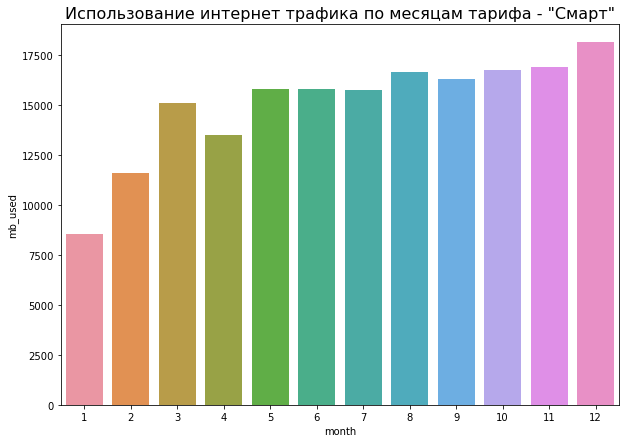

In [62]:
temp = tarifs_use.reset_index()
smart = temp[temp['tariff_name'] == 'smart']
sns.barplot(smart['month'], smart['mb_used'], data=smart)
plt.title('Использование интернет трафика по месяцам тарифа - "Смарт"', fontdict=font);

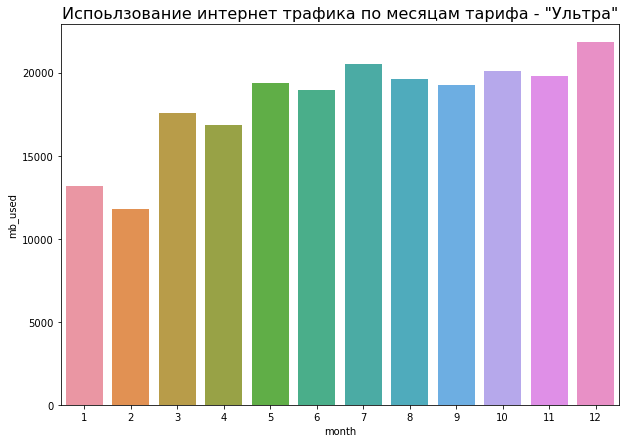

In [63]:
ultra = temp[temp['tariff_name'] == 'ultra']
sns.barplot(ultra['month'], ultra['mb_used'], data=ultra)
plt.title('Испоьлзование интернет трафика по месяцам тарифа - "Ультра"', fontdict=font);

In [64]:
tarifs_use_average = (df.pivot_table(index=['tariff_name'], values=[
                                                                     'minutes_calls', 
                                                                     'count_messages',
                                                                     'mb_used',
                                                                     'total_paid'])
              )
tarifs_use_average

,count_messages,mb_used,minutes_calls,total_paid
tariff_name,,,,
smart,33.384029,16237.184388,429.450875,1312.512337
ultra,49.363452,19488.703553,540.779695,2071.065990


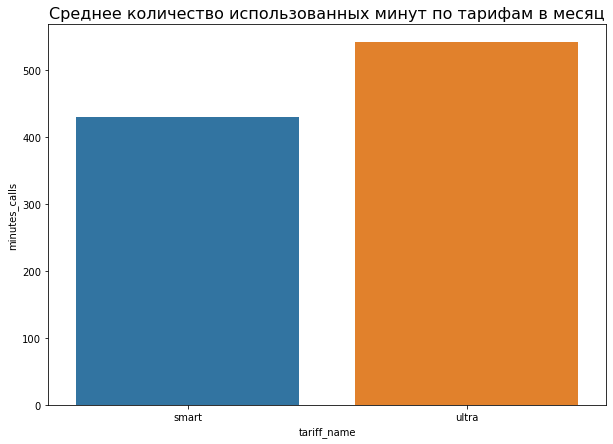

In [65]:
temp = tarifs_use_average.reset_index()
sns.barplot(temp['tariff_name'], temp['minutes_calls'], data=temp)
plt.title('Среднее количество использованных минут по тарифам в месяц', fontdict=font);

#### Вывод
- Использование интернет трафика возрастало на обоих тарифах в течении года.
- Общее распределение показывает что пользователи тарифа "Ультра" в среднем не могут использовать предоставляемый им пакет услуг, из 1000 смс всего 50, из 30 Гб всего 20. и по звонкам из 3000 минут только 500 это все лишь шестая часть. Но средняя ежемесячная цена выше чем цена за пакет. Свою роль играют выбросы (отдельные пользователи которые поднимают среднюю цену), это также подтверждает график boxplot. В дальнейшем при формировании гипотез мы отбросим выбросы.
- Пользователи тарифа "Смарт" пользуются услугами чуть меньше чем пользователи тарифа "Ультра". Они часто пользуются дополнительными услагами. 

### Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. 

In [93]:
## Функция возврата параметров 
def get_parametr(df, name_column):
    """
    df: pandas DataFrame
    name_column: name column 'string'
    return: min, max, mean, std, median, var
    """
    df = df.groupby('tariff_name').agg({f'{name_column}': ['min', 'max', 'mean', 'std', 'median', 'var']})
    return df

### Время разговора

In [112]:
get_parametr(data, 'minutes_calls')

minutes_calls                                         \
                      min     max        mean         std median   
tariff_name                                                        
smart                 0.0  1471.0  429.450875  194.871174  435.0   
ultra                 0.0  1727.0  540.779695  325.738740  532.0   

                            
                       var  
tariff_name                 
smart         37974.774628  
ultra        106105.726823

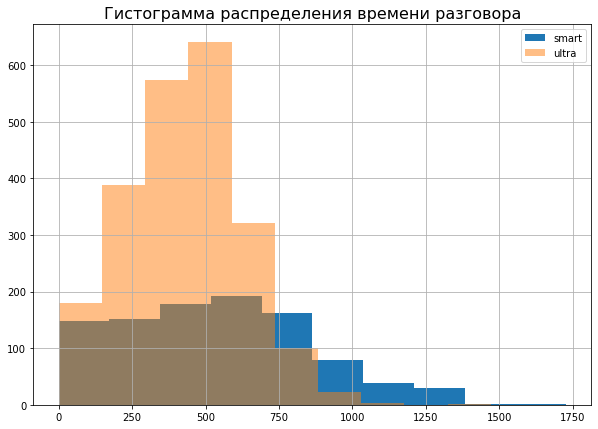

In [122]:
data[data['tariff_name'] == 'ultra']['minutes_calls'].hist(label='smart')
data[data['tariff_name'] == 'smart']['minutes_calls'].hist(label='ultra', alpha=0.5)
plt.title('Гистограмма распределения времени разговора', fontdict=font)
plt.legend();


### Сообщения

In [126]:
get_parametr(data, 'count_messages')

count_messages                                                 
                       min    max       mean        std median          var
tariff_name                                                                
smart                  0.0  143.0  33.384029  28.227876   28.0   796.812958
ultra                  0.0  224.0  49.363452  47.804457   38.0  2285.266143

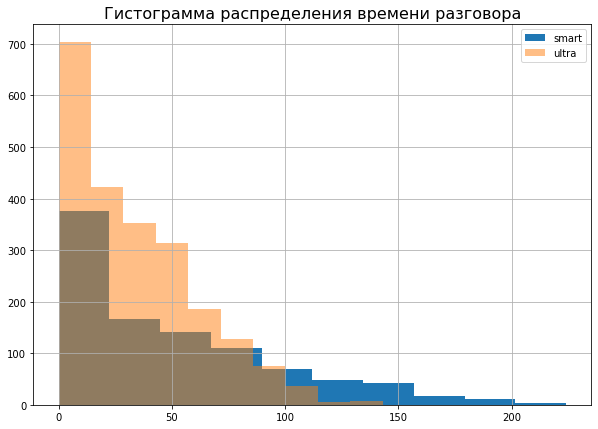

In [127]:
data[data['tariff_name'] == 'ultra']['count_messages'].hist(label='smart')
data[data['tariff_name'] == 'smart']['count_messages'].hist(label='ultra', alpha=0.5)
plt.title('Гистограмма распределения количества сообщений', fontdict=font)
plt.legend();

In [83]:
data.head()

,user_id,age,tariff_name,city,month,minutes_calls,count_calls,cost_calls,count_messages,cost_messages,mb_used,cost_internet,additional_services,total_paid,churn_date,region
0,1005,67,smart,Набережные Челны,1,99.0,15.0,0.0,7.0,0.0,2730.0,0.0,0.0,550.0,False,other
1,1032,31,smart,Ульяновск,1,397.0,61.0,0.0,38.0,0.0,24158.0,1800.0,1800.0,2350.0,False,other
2,1045,48,smart,Улан-Удэ,1,9.0,1.0,0.0,5.0,0.0,2348.0,0.0,0.0,550.0,False,other
3,1055,39,smart,Казань,1,568.0,64.0,204.0,30.0,0.0,17115.0,400.0,604.0,1154.0,False,other
4,1071,20,smart,Омск,1,200.0,24.0,0.0,16.0,0.0,15625.0,200.0,200.0,750.0,True,other


### Интернет трафик

In [128]:
get_parametr(data, 'mb_used')

mb_used                                                \
                min      max          mean           std   median   
tariff_name                                                         
smart           0.0  38627.0  16237.184388   5879.795158  16540.0   
ultra           0.0  49793.0  19488.703553  10097.107541  19324.0   

                           
                      var  
tariff_name                
smart        3.457199e+07  
ultra        1.019516e+08

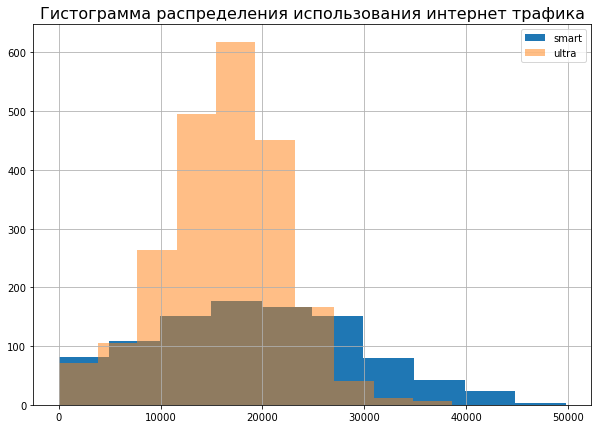

In [129]:
data[data['tariff_name'] == 'ultra']['mb_used'].hist(label='smart')
data[data['tariff_name'] == 'smart']['mb_used'].hist(label='ultra', alpha=0.5)
plt.title('Гистограмма распределения использования интернет трафика', fontdict=font)
plt.legend();

<a name="5"></a>
# 5. Проверка  гипотез

[К оглавлению](#1)


- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


### Удаление выбросов и смотрим boxplot

In [ ]:
Удаление выбросов

In [136]:
def get_clear_data_or_boxplot(df, column, value=None):
    """
    return boxplot в 1.5 квартильных размаха
    При передаче параметра value - возвращает Series переданного столбца
    """  
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75)
    # межквантильный размах
    range_quantile = q3 - q1   
    data = df[(df[column] >= (q1 - 1.5*range_quantile)) & 
              (df[column] <= (q3 + 1.5*range_quantile))]
    if value:
        return data[column]
    return data.boxplot([column], figsize=(10, 7))

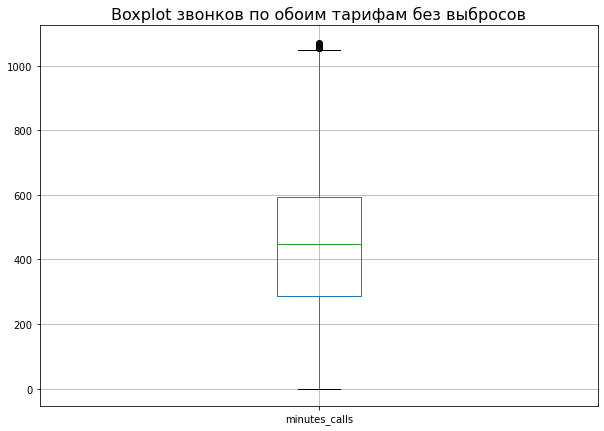

In [143]:
get_clear_data_or_boxplot(data, 'minutes_calls')
plt.title('Boxplot звонков по обоим тарифам без выбросов', fontdict=font);

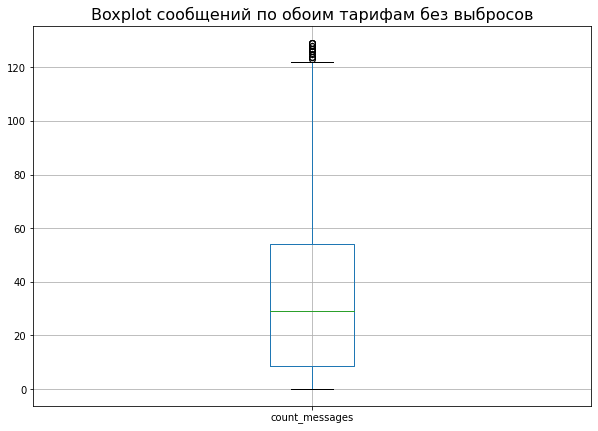

In [144]:
get_clear_data_or_boxplot(data, 'count_messages')
plt.title('Boxplot сообщений по обоим тарифам без выбросов', fontdict=font);

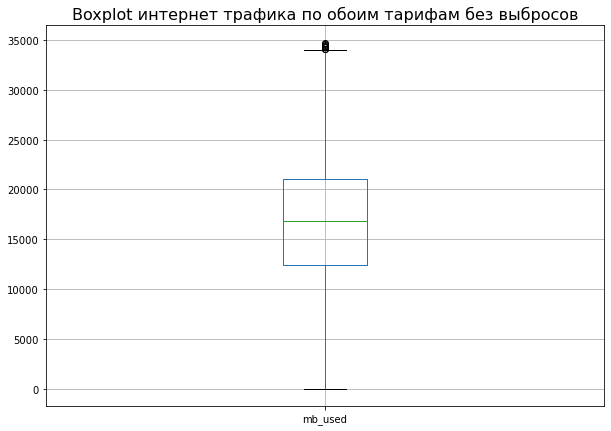

In [146]:
get_clear_data_or_boxplot(data, 'mb_used')
plt.title('Boxplot интернет трафика по обоим тарифам без выбросов', fontdict=font);

### Делим данные по тарифам

In [150]:
data.head()

,user_id,age,tariff_name,city,month,minutes_calls,count_calls,cost_calls,count_messages,cost_messages,mb_used,cost_internet,additional_services,total_paid,churn_date,region
0,1005,67,smart,Набережные Челны,1,99.0,15.0,0.0,7.0,0.0,2730.0,0.0,0.0,550.0,False,other
1,1032,31,smart,Ульяновск,1,397.0,61.0,0.0,38.0,0.0,24158.0,1800.0,1800.0,2350.0,False,other
2,1045,48,smart,Улан-Удэ,1,9.0,1.0,0.0,5.0,0.0,2348.0,0.0,0.0,550.0,False,other
3,1055,39,smart,Казань,1,568.0,64.0,204.0,30.0,0.0,17115.0,400.0,604.0,1154.0,False,other
4,1071,20,smart,Омск,1,200.0,24.0,0.0,16.0,0.0,15625.0,200.0,200.0,750.0,True,other


In [152]:
ultra = data[data['tariff_name'] == 'ultra']
smart = data[data['tariff_name'] == 'smart']

### Подготовленные данные

In [161]:
ultra_total_paid_clear = get_clear_data_or_boxplot(ultra, 'total_paid', value=1)
ultra_total_paid = ultra['total_paid']


smart_total_paid_clear = get_clear_data_or_boxplot(smart, 'total_paid', value=1)
smart_total_paid = smart['total_paid']

## Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


Нулевая гипотеза H₀:

> Средняя выручка пользователей тарифов "Ультра" и "Смарт" **не различается**

Гипотеза H₁:

> Средняя выручка пользователей тарифов "Ультра" и "Смарт" **различается**

Пороговое значение (критический уровень статистической значимости) зададим равным `alpha = 0.05`.



In [162]:
get_parametr(data, 'total_paid')

total_paid                                                        
                   min     max         mean         std  median            var
tariff_name                                                                   
smart            550.0  6824.0  1312.512337  830.938122  1075.0  690458.161989
ultra           1950.0  4800.0  2071.065990  378.802377  1950.0  143491.240560

### Проверка на очищенных данных

In [174]:
alpha = 0.05
results = st.ttest_ind(ultra_total_paid_clear, smart_total_paid_clear)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.012746682932018e-144
Отвергаем нулевую гипотезу


### Проверка на всех значениях выборки

In [167]:
alpha = 0.05
results = st.ttest_ind(ultra_total_paid, smart_total_paid)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.857477410979864e-149
Отвергаем нулевую гипотезу


### Вывод:

- p-уровень значимости меньше порогового значения. Вероятность получить различия случайно равна:  
     - **6.857477410979864e-149** на всех значениях 
     - **3.012746682932018e-144** на значениях без выбросов
- Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.
- Гипотеза H₁ подтвердилась


## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


Нулевая гипотеза H₀:

> Cредняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов

Гипотеза H₁:

> Cредняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

Пороговое значение (критический уровень статистической значимости) зададим равным `alpha=0.05`.

### Подготовленные данные

In [181]:
moscow = data[data['city'] == 'Москва']
other = data[data['city'] != 'Москва']

In [187]:
mean_moscow_total_paid_clear = get_clear_data_or_boxplot(moscow, 'total_paid', value=1)
mean_moscow_total_paid = moscow['total_paid']


mean_other_total_paid_clear = get_clear_data_or_boxplot(other, 'total_paid', value=1)
mean_other_total_paid = other['total_paid']

### Проверка на очищенных данных

In [190]:
alpha = 0.05
results = st.ttest_ind(mean_moscow_total_paid_clear, mean_other_total_paid_clear)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2887252778218871
Не получилось отвергнуть нулевую гипотезу


### Проверка на всех значениях выборки

In [191]:
alpha = 0.05
results = st.ttest_ind(mean_moscow_total_paid, mean_other_total_paid)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.578869733775166
Не получилось отвергнуть нулевую гипотезу


### Вывод:

- p-уровень значимости выше порогового значения. Вероятность получить различия случайно равна:  
     - **0.578869733775166** на всех значениях 
     - **0.2887252778218871** на значениях без выбросов
     - С вероятностью в **29% или 57%** (в зависимости обработаны данные от выбросов или нет) такой результат может быть получен случайно
- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
- Гипотеза H₁ не подтвердилась


<a name="6"></a>
# 6. Выводы и результаты исследования

[К оглавлению](#1)



**Всего в нашей выборке 500 абонентов:**
- тариф smart 351 пользователя
- тариф ultra 149 пользователя

##### из которых действующих 462:

- тариф smart 328
- тариф ultra 134

##### прекративших пользоваться услугами 38**:
- тариф smart 23
- тариф ultra 15



- Графики распределения средств по месяцам показывают что пользователи тарифа "Ультра" платят за тариф каждый месяц примерно одинаково. Пользователи "Смарт" увеличивают расходы на услуги связи из месяца в месяц.
- Средняя ежемесячная плата пользователей за услуги составляет:
    - тариф "Смарт" - 1312 рублей
    - тариф "Ультра" - 2071 рублей
- Польователи в тарифе "Смарт" платят за дополнительный сервис 762 руб., когда на тарифе "Ультра" эта сумма составляет 121 руб.
- Самая главная строка расходов это интернет трафик. Практически вся сумма допов складывается из него.
- Пользователи "Смарт" тратят в 3 раза больще средств чем стоит их ежемесячный платеж за услуги. 
- Сообщения сегодня не в моде - скорее всего это связано с тем, что общение происходит через социальные сети.
- Пользователям тарифа "Смарт" ежемесячно не хватает 3-4 Гб трафика.
- Использование интернет трафика возрастало на обоих тарифах в течении года.
- Общее распределение показывает что пользователи тарифа "Ультра" в среднем не могут использовать предоставляемый им пакет услуг, из 1000 смс всего 50, из 30 Гб всего 20. и по звонкам из 3000 минут только 500 это все лишь шестая часть. Но средняя ежемесячная цена выше чем цена за пакет. Свою роль играют выбросы (отдельные пользователи которые поднимают среднюю цену), это также подтверждает график boxplot. 
- Пользователи тарифа "Смарт" активно пользуются дополнительными услугами. 

Из двух выдвинутых гипотез подтвердилась только первая:

- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

**Чтобы однозначно отвечетить на вопрос "какой тариф лучше" исходя из вышеприведенного анализа выборочных совокупностей и гипотезы, требуется дополнительная информация об издержках оператора на предоставление услуг. Так как, необходимо видеть среднюю чистую прибыль на абонента каждого тарифа.
Со стороны потока денежных средств - "Ультра" обеспечивает его в большем объеме.**
